### SVM：支持向量机

- 与传统算法进行对比，看看SVM究竟能带来什么样的效果

- 软间隔的作用，这么复杂的算法肯定会导致过拟合现象，如何来进行解决呢？

- 核函数的作用，如果只是做线性分类，好像轮不到SVM登场了，核函数才是它的强大之处！

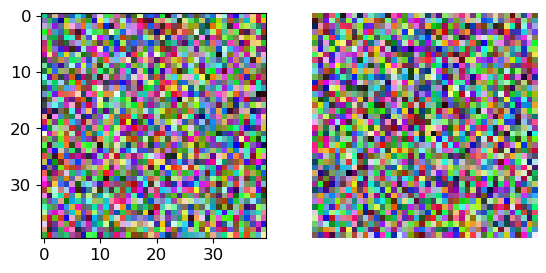

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 随机生成一个400x400的RGB图像
image = np.random.randint(0, 256, size=(40, 40, 3), dtype=np.uint8)
image2 = np.random.randint(0, 256, size=(40, 40, 3), dtype=np.uint8)
# 显示图像
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [35]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

### 支持向量机带来的效果

In [3]:
from sklearn.svm import SVC
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear',C=1e6)
svm_clf.fit(X,y)

SVC(C=1000000.0, kernel='linear')

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

[1.29411744 0.82352928]


(0.0, 5.5, 0.0, 2.0)

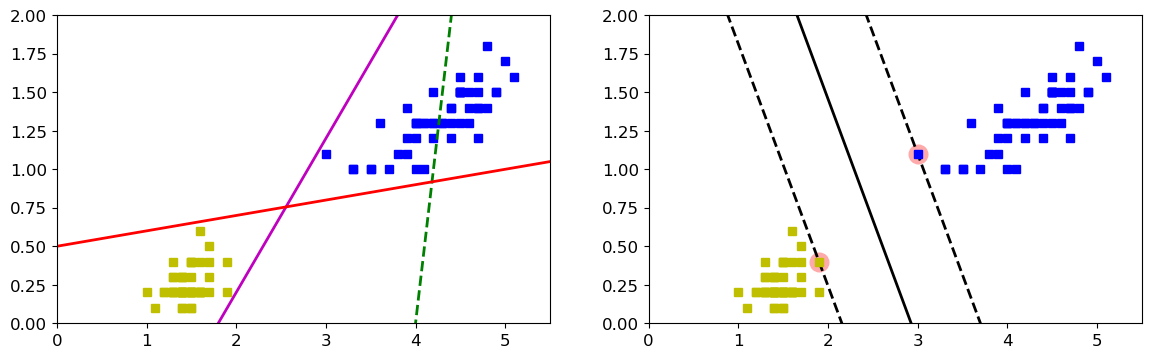

In [5]:
# 一般的模型
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    print (w)
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m-',linewidth=2)
plt.plot(x0,pred_3,'r-',linewidth=2)
plt.axis([0,5.5,0,2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])

### 数据标准化的影响

![title](./img/2.png)

### 软间隔

-如果不加入软间隔会遇到哪些问题呢？

![title](./img/3.png)

可以使用超参数C控制软间隔程度：

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Viginica

svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',LinearSVC(C=0.1))
))   
svm_clf.fit(X,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=0.1))])

In [7]:
svm_clf.predict([[5.5,1.7]])

array([1.])

对比不同C值所带来的效果差异

In [8]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=0.1,random_state = 42)
svm_clf2 = LinearSVC(C=500,random_state = 42)

scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf1)
))  

scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf2)
)) 
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=500, random_state=42))])

In [9]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

[0.3885632  1.26314611]
[1.80717478 3.2744941 ]


(4.0, 6.0, 0.8, 2.8)

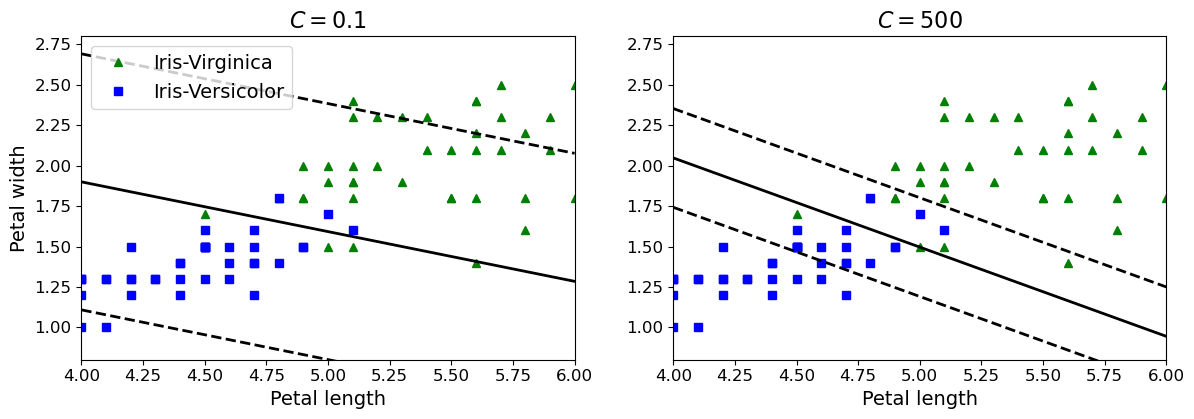

In [10]:
plt.figure(figsize=(14,4.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

- 在右侧，使用较高的C值，分类器会减少误分类，但最终会有较小间隔。
- 在左侧，使用较低的C值，间隔要大得多，但很多实例最终会出现在间隔之内。

### 非线性支持向量机

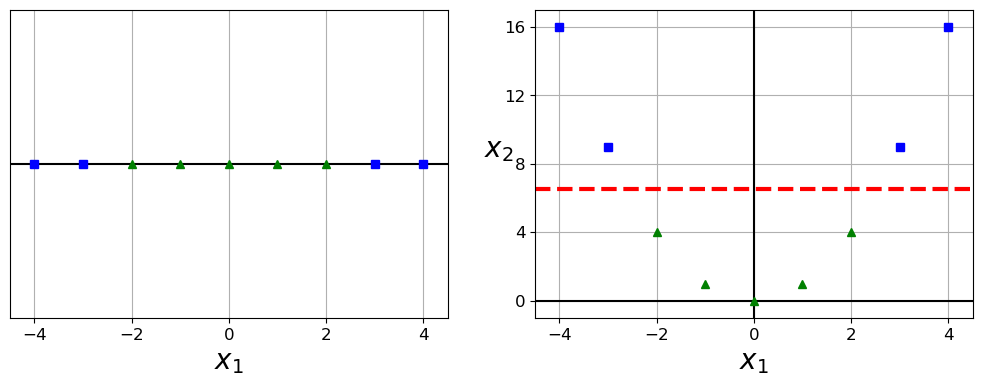

In [11]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))


plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])


plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

创建一份有点难度的数据

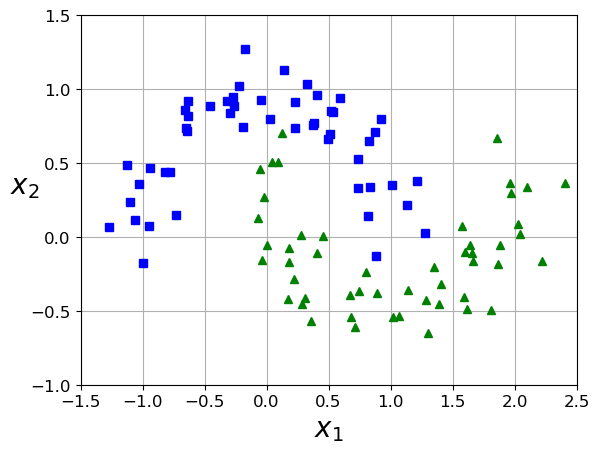

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf=Pipeline((("poly_features",PolynomialFeatures(degree=3)),
                            ("scaler",StandardScaler()),
                            ("svm_clf",LinearSVC(C=10,loss="hinge"))
                            ))

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

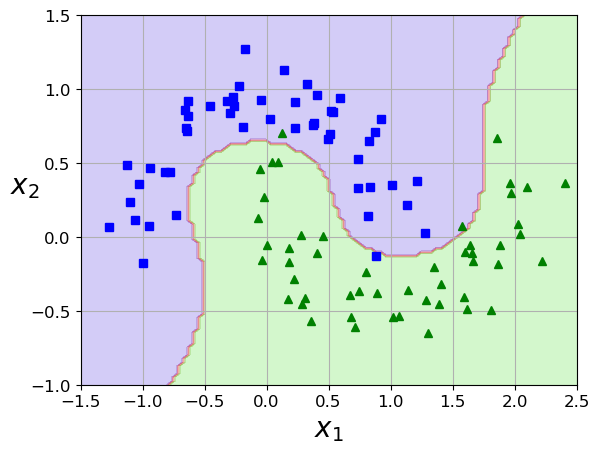

In [14]:
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

### SVM中的核技巧

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [16]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

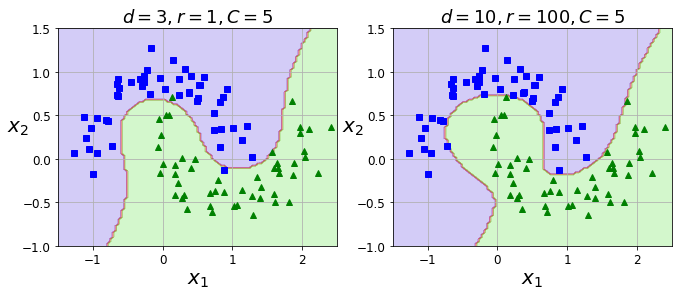

In [137]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

coef0表示偏置项

### 高斯核函数：
- 利用相似度来变换特征

* 选择一份一维数据集，并在 $x_1 = -2$ 和 $x_1 = 1$ 处为其添加两个高斯函数。
* 接下来，让我们将相似度函数定义为 $γ= 0.3$ 的径向基函数（RBF）

![title](./img/5.png)

例如：**$x_1 = -1$** ：它位于距第一个地标距离为**1**的地方，距第二个地标距离为 **2**。因此，其新特征是 $x_2 = exp（-0.3×1^2）≈0.74$ 并且 $x_3 = exp（-0.3×2^2）≈0.30$。

![title](./img/6.png)

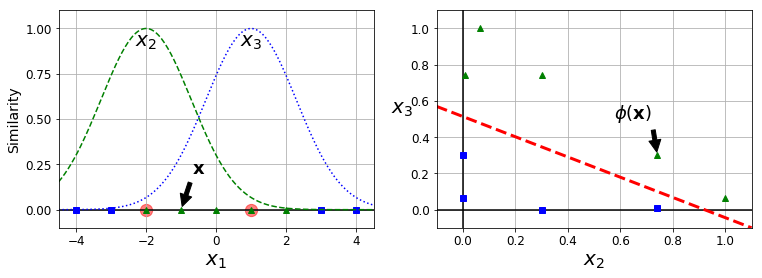

In [143]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

理论情况下会得到怎么维特征呢？可以对每一个实例（样本数据点）创建一个地标，此时会将m*n的训练集转换成m*m的训练集

### SVM中利用了核函数的计算技巧，大大降低了计算复杂度：

- 增加 gamma γ 使高斯曲线变窄，因此每个实例的影响范围都较小：决策边界最终变得更不规则，在个别实例周围摆动。
- 减少 gamma γ 使高斯曲线变宽，因此实例具有更大的影响范围，并且决策边界更加平滑。

In [139]:
rbf_kernel_svm_clf = Pipeline(( 
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

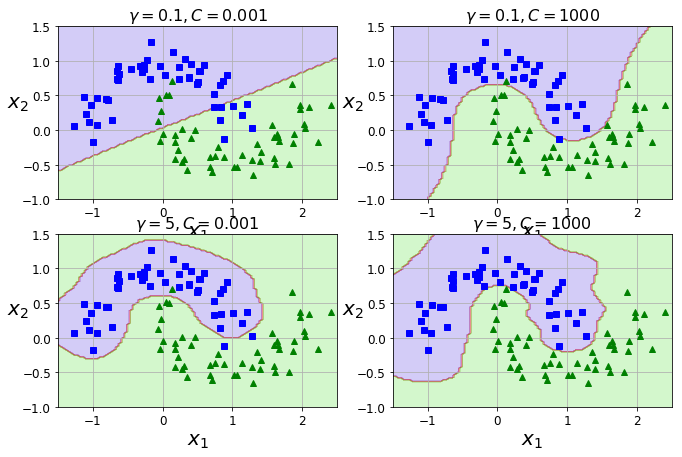

In [140]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()